# Demonstration of the Basic Concepts of Differential Geometry

## References

1. 3-pages intro in Appendix A (p. 32-35) https://arxiv.org/pdf/1102.0075.pdf

2. P.-A. Absil, Robert Mahony, Rodolphe Sepulchre. Optimization Algorithms on Matrix Manifolds, Chapter 3 http://www.eeci-institute.eu/GSC2011/Photos-EECI/EECI-GSC-2011-M5/book_AMS.pdf

3. Peter Petersen. Riemannian Geometry http://math.ecnu.edu.cn/~lfzhou/seminar/[Petersen_P.]_Riemannian_geometry.pdf

4. И. Тайманов. Лекции по дифференциальной геометрии. I. Кривые и поверхности.
http://www.math.nsc.ru/~taimanov/courses/ru/geometry/book1.pdf

5. И. Тайманов. Лекции по дифференциальной геометрии. II. Риманова геометрия http://www.math.nsc.ru/~taimanov/courses/ru/geometry/book2.pdf

6. M.J.A. Zeestraten. Programming by Demonstration on Riemannian Manifolds (PhD Thesis) https://www.martijnzeestraten.nl/images/publications/Zeestraten2017_PhDThesis.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sphere (S2) as a Manifold

A **manifold** $M$ is a $d$-dimensional topological space that is locally can be approximated by a real coordinate
space $\mathbb{R}^d$. That is there is a map
that assigns numerical values to each point of the manifold, which is called a (coordinate) chart:
$$\psi: U \rightarrow \Omega$$

It maps a subset $U \in M$ to a subset $\Omega \in R^d$. An atlas is a family of
charts that covers the manifold.

In [2]:
def PlotSphere(ax, R=1.0, lim=1.1, n_elems=100, color=[0.8, 0.8, 0.8], alpha=0.8, linewidth=0, **kwargs):

    theta = np.linspace(0, np.pi, n_elems)
    phi = np.linspace(0, 2*np.pi, n_elems)

    x = R*np.outer(np.cos(phi), np.sin(theta))
    y = R*np.outer(np.sin(phi), np.sin(theta))
    z = R*np.outer(np.ones(np.size(phi)), np.cos(theta))

    ax.plot_surface(x, y, z,  rstride=2, cstride=2, color=color, linewidth=linewidth, alpha=alpha, **kwargs)

    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.set_zlim([-lim, lim])

<IPython.core.display.Javascript object>


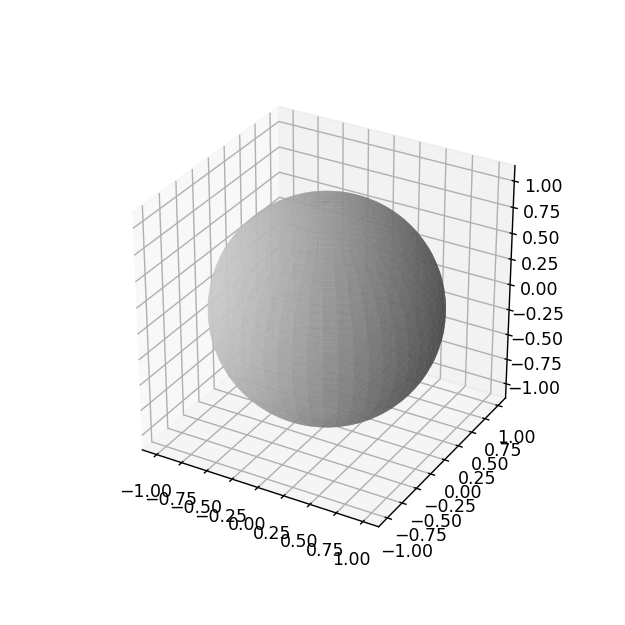

In [3]:
%matplotlib notebook

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='3d')
PlotSphere(ax)

# Tangent plane

The functional $V_{p,\gamma} = (···\circ \gamma)′[\gamma^{-1}[p]]$ is a vector
that is tangent to a path $\gamma(t)$ at $p$. The tangent vectors of all possible paths through $p$ form the **tangent space** $T_{p}M$.

In [4]:
def PlotBase(ax, g, marker='*', color='blue'):
    ax.plot(xs=[g[0]], ys=[g[1]], zs=[g[2]], marker=marker, color=color)

[Rodrigues' rotation formula](https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula)

In [5]:
def CrossProductMatrix(w):
    return np.array([[0, -w[2], w[1]], 
                     [w[2], 0, -w[0]],
                     [-w[1], w[0], 0]])

In [6]:
def RotationMatrix(axis, angle):
    K = CrossProductMatrix(axis)
    
    return np.eye(3) + np.sin(angle)*K + (1 - np.cos(angle))*np.dot(K, K)

In [7]:
def AxisAngle(d):
    norm = np.sqrt(d[0]**2 + d[1]**2)
    if norm < 1e-6:
        return (np.array([0, 0, 1]), 0)
    else:
        vec = np.array([-d[1], d[0], 0])
        return (vec/norm, np.arccos(d[2]))

In [8]:
def PlotTangentPlane(ax, g, len_vert=1, color='gray', alpha=0.1, linewidth=0, **kwargs):
    # Tangent axis at 0 rotation:
    T0 = np.array([[1, 0],
                   [0, 1],
                   [0, 0]])
    
    # Rotation matrix with respect to zero:
    (axis, ang) = AxisAngle(g)
    R = RotationMatrix(axis, -ang)
    
    # Tangent axis in new plane:
    T = np.dot(R.T, T0)
    
    # Compute vertices of tangent plane at g
    hl = 0.5*len_vert
    X = [[hl, hl],  # p0
         [hl, -hl], # p1
         [-hl, hl], # p2
         [-hl, -hl]]# p3
    
    X = np.array(X).T
    points = (np.dot(T, X).T + g).T
    psurf = points.reshape((-1, 2, 2))
    
    ax.plot_surface(psurf[0, :], psurf[1, :], psurf[2, :], color=color, alpha=alpha, linewidth=0, **kwargs)

In [9]:
# 2D Rotation matrix:
fR = lambda theta: np.array([[np.cos(theta),-np.sin(theta)],
                             [np.sin(theta),np.cos(theta)]])

In [10]:
def action(x, g, h):
    ''' Moves x relative to g, to y relative to h'''
    
    # Convert possible list into nparray
    if type(x) is list:
        x = np.vstack(x)

    # Get rotation of origin e to g
    ax, angle = AxisAngle(g)
    Reg = RotationMatrix(ax, angle)

    # Get rotation of origin e to h
    ax, angle = AxisAngle(h)
    Reh = RotationMatrix(ax, angle)

    # Creat rotation that moves x from g to the origin e,
    # and then from e to h:
    A = np.dot(Reh, Reg.T)

    return np.dot(x, A.T)

In [11]:
def TangentPoint(Xtg, g, e=np.array([0, 0, 1])):
    Xe = np.hstack([Xtg, np.ones((Xtg.shape[0], 1))])   # Tangent space at origini
    Xg = action(Xe, e, g) # Perform action
    
    return Xg

In [12]:
def TangentBase(g, vlength=0.4, angle=0):
    R = fR(angle)
    Xg = TangentPoint(np.dot(R, np.eye(2))*vlength, g)
    
    return Xg

In [13]:
def TangentVector(g, coeffs=[1.0, 1.0]):
    return np.dot(coeffs, TangentBase(g) - g) + g

In [14]:
def PlotTangentBase(ax, g, e=np.array([0, 0, 1]), colors=np.eye(3), vlength=0.4, 
                    alpha=1, linestyle='-', label='', angle=0, **kwargs):
    # Get tangent base in G
    Xg = TangentBase(g, vlength, angle)
    
    # Plot tangent vector:
    name = ''
    for j in range(2):
        if j==1:
            name = label

        v = np.vstack([Xg[j, :], g])
        ax.plot(v[:, 0], v[:, 1], v[:, 2], '-', color=colors[j, :], linewidth=2,
                alpha=alpha, linestyle=linestyle, label=name, **kwargs)

In [15]:
def SpherePoint(theta, phi, R=1.0):
    return np.array([R*np.sin(theta)*np.cos(phi), 
                     R*np.sin(theta)*np.sin(phi),
                     R*np.cos(theta)])

<IPython.core.display.Javascript object>


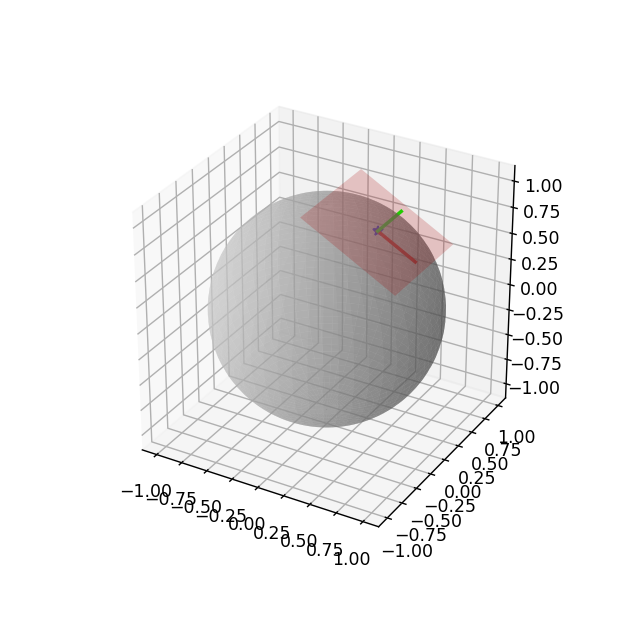

In [16]:
%matplotlib notebook

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='3d')
PlotSphere(ax, alpha=0.5)

g = SpherePoint(0.5, 0)
PlotTangentPlane(ax, g, len_vert=1, color='red', alpha=0.2, linewidth=0)
PlotBase(ax, g)
PlotTangentBase(ax, g)

# Logarithmic and Exponential Mappings

The **exponential map** $Exp_g (·) : T_{p}M \rightarrow M $ is a distance preserving map from the tangent
space to the manifold. $Exp_g (p)$ maps $a$ to $p$ in such a way that $p$ lies on the geodesic
through $g$ with direction $a$, and the distance between $g$ and $p$ is $||a|| = \langle p,p\rangle_g$.

The inverse of the exponential map is called the **logarithmic map** $Log_g (·) : M \rightarrow T_{g}M$.

In [17]:
def Log_e(g, reg=1e-10):
    '''Map values g, that lie on the Manifold, into the tangent space at the origin'''
    
    # Check input
    d_added = False
    if g.ndim ==2:
        # Batch operation,
        # Assume all values lie at the origin:
        val = np.zeros((g.shape[0], 2))

        # Compute distance for all values that are larger than the regularization:
        cond = (1 - g[:, 2]) > reg
        sl_2 = np.ix_(cond, [2])
        sl_01 = np.ix_(cond, range(0, 2))

        val[sl_01] = (g[sl_01].T*(np.arccos(g[sl_2])[:, 0]/np.linalg.norm(g[sl_01], axis=1))).T
        return val 
    else:
        # single mode:
        if abs(1 - g[2]) > reg:
            return np.arccos(g[2])*g[0:2]/np.linalg.norm(g[0:2])
        else:
            return np.array([0, 0])

def Log(x, g, reg=1e-10):

    if type(x) is list:
        x = np.vstack(x)

    # Get rotation of origin e to g
    ax, angle = AxisAngle(g)
    Reg = RotationMatrix(ax, angle)

    return Log_e(np.dot(x, Reg), reg)

In [18]:
def Exp_e(g_tan, reg=1e-6):
    if g_tan.ndim ==2:
        # Batch operation:
    
        # Standard we assume unit values:
        val = np.vstack((np.zeros((2, g_tan.shape[0])), np.ones(g_tan.shape[0]))).T
        
        # Compute distance for all values that are larger than the regularization:
        norm = np.linalg.norm(g_tan, axis=1)
        cond = norm > reg
        sl_2 = np.ix_(cond, [2])
        sl_01 = np.ix_(cond, range(0, 2))

        norm = norm[np.ix_(cond)]         # Throw away the norms we don't use
        gt_norm = (g_tan[sl_01].T/norm).T # Normalize the input vector of selected values

        val[sl_2] = np.cos(norm)[:, None]
        val[sl_01] = (gt_norm.T*np.sin(norm)).T

        return val 
    else:
        # Single mode:
        norm = np.linalg.norm(g_tan)
        if norm > reg:
            gt_norm = g_tan/norm
            return np.hstack((np.sin(norm)*gt_norm, [np.cos(norm)]))
        else:
            return np.array([0, 0, 1])

def Exp(x, g, reg=1e-10):

    if type(x) is list:
        x = np.vstack(x)

    # Get rotation of origin e to g
    ax, angle = AxisAngle(g)
    Reg = RotationMatrix(ax, angle)

    return np.dot(Exp_e(x, reg), Reg.T)

# Geodesic Curves

A manifold $M$ with a Riemannian metric — a positive definite inner product $\langle\cdot, \cdot\rangle_{p}$ defined
on each tangent space $T_{p}M$ — is called a Riemannian manifold.

The length of a path $\gamma(t)$ between $a, b \in M$ is measured by
$$L^b
_a(\gamma) =
\int^b_a \langle \dot{\gamma}(t), \dot{\gamma}(t)\rangle_{\gamma(t)}dt$$
The distance between two points can be found by minimizing this length for $\gamma$,
i.e.
$$dist(a,b) = min L^b
_a(\gamma)$$

The path $\gamma$ that minimizes this distance lies on a **geodesic** — the generalization of the straight line
to Riemannian manifolds.

In [19]:
def GeodesicCurve(g, h, n_elem=20, t_st=0, t_end=1):
    ts = (np.linspace(t_st, t_end, n_elem, endpoint=True)*Log(h, g)[:, None]).T
    
    return Exp(ts, g)

In [20]:
def PlotGeodesic(ax, g, h, n_data=20, t_st=0, t_end=1, linewidth=1,
                 linestyle='--', color='red', **kwargs):
    points = GeodesicCurve(g, h, n_data, t_st, t_end)

    ax.plot(points[:, 0], points[:, 1], points[:, 2], linewidth=linewidth,
            linestyle=linestyle, color=color, **kwargs)

In [21]:
def PlotLog(ax, g, h, n_data=20, t_st=0, t_end=1, linewidth=1,
             linestyle='-', color='red', **kwargs):
    points = Log(GeodesicCurve(g, h, n_data, t_st, t_end), g)
    points3D = np.array([TangentVector(g, coeffs=points[i, :]) for i in range(points.shape[0])])

    ax.plot(points3D[:, 0], points3D[:, 1], points3D[:, 2], linewidth=linewidth,
            linestyle=linestyle, color=color, **kwargs)
    PlotBase(ax, points3D[-1, :], marker='.', color='green')

<IPython.core.display.Javascript object>


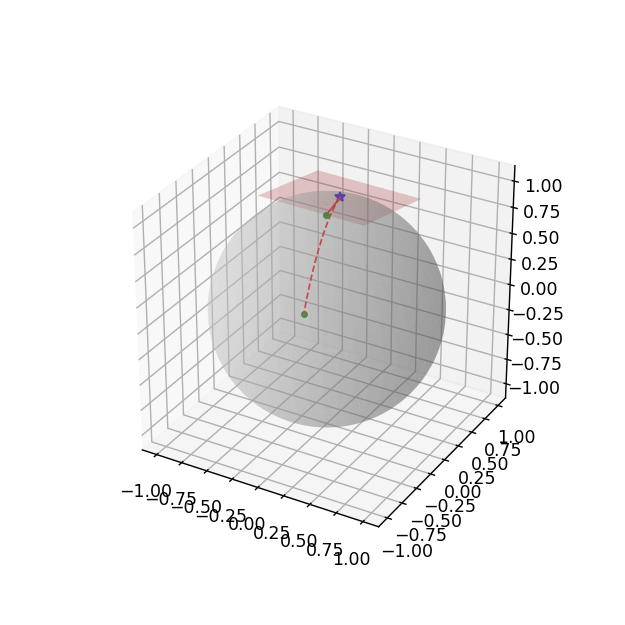

In [22]:
%matplotlib notebook

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='3d')
PlotSphere(ax, alpha=0.3)

g = SpherePoint(0.2, 1.5)
h = SpherePoint(1.1, 1.6*np.pi)
PlotTangentPlane(ax, g, len_vert=1, color='red', alpha=0.2, linewidth=0)
PlotBase(ax, g)
PlotBase(ax, h, marker='.', color='green')
PlotGeodesic(ax, g, h)
PlotLog(ax, g, h)

# Parallel Transport

**Parallel transport** moves vectors between two tangent spaces along the geodesic that
connects the tangent bases; thereby maintaining a constant angle between the vector
and the geodesic.

In [23]:
def ParallelTransport(Xg, g, h, t=1):
    ''' Parallel transport of vectors in X from h to g*t,   0 <= t <= 1
        Implementation is modified version of the one reported in
        Optimization algorithms on Manifolds:
        Xg: array of tangent vectors to parallel transport  n_data x n_dimT
        g: base of tangent vectors                          n_dimM
        h: final point of tangent vectors                   n_dimM
        t: position on curve between g and h                0 <= t <= 1
    '''
    
    # Compute final point based on t
    if t < 1:
        ht = Exp(Log(h, g)*t, g) # current position of h*t in on manifold
    else:
        ht = h
    
    # Compute rotations between different locations:
    
    # Rotation between origin and g
    (ax, angle) = AxisAngle(g)
    Reg = RotationMatrix(ax, angle)
    
    # Rotation between origin and ht (in the original atlas)
    (ax, angle) = AxisAngle(ht)
    Reh = RotationMatrix(ax, angle)  # Rotation between final point and origin
    
    # Compute orientation at ht using parallel transpot
    v = np.dot(Reg, np.hstack([Log(h,g),[0]])) # Direction vector in R3
    m = np.linalg.norm(v)  # Angle of rotation
    
    # Compute Tangential rotation (this is done in n_dimM)
    if m < 1e-10:
        Rgh = np.eye(3)
    else:
        u = (v/m)[:, None]
        g = g[:, None]

        Rgh = (-g*np.sin(m*t)*u.T + u*np.cos(m*t)*u.T + (np.eye(3) - u.dot(u.T)))
        
    # Finally compute rotation compensation to achieve parallel transport:
    Ie = np.eye(3)[:, 0:2].T
    Ig = np.dot(Ie, Reg.T)                   # Base orientation at g
    Ih = np.dot(Ig, Rgh.T)                   # Base orientation at h by parallel transport
    Ie_p = np.dot(Ih, Reh)                     # Tangent space orientation at origin with parallel transport
    
    # Compute relative rotation:
    R = np.dot(Ie, Ie_p.T)
                 
    # Transform tangent data and return:
    return np.dot(Xg, R.T)

In [24]:
def PlotParallelTransport(ax, g_tan, g, h, t=1, linewidth=2,
                          linestyle='-', color='orange', **kwargs):
    g_tan_transported = ParallelTransport(g_tan[:2], g, h, t)
    points = np.vstack([g_tan, TangentVector(h, coeffs=g_tan_transported)])
    
    v = np.vstack([g_tan, g])
    ax.plot(v[:, 0], v[:, 1], v[:, 2], linewidth=linewidth,
            linestyle=linestyle, color=color, **kwargs)
    
    v = np.vstack([points[1, :], h])
    ax.plot(v[:, 0], v[:, 1], v[:, 2], linewidth=linewidth,
            linestyle=linestyle, color=color, **kwargs)

<IPython.core.display.Javascript object>


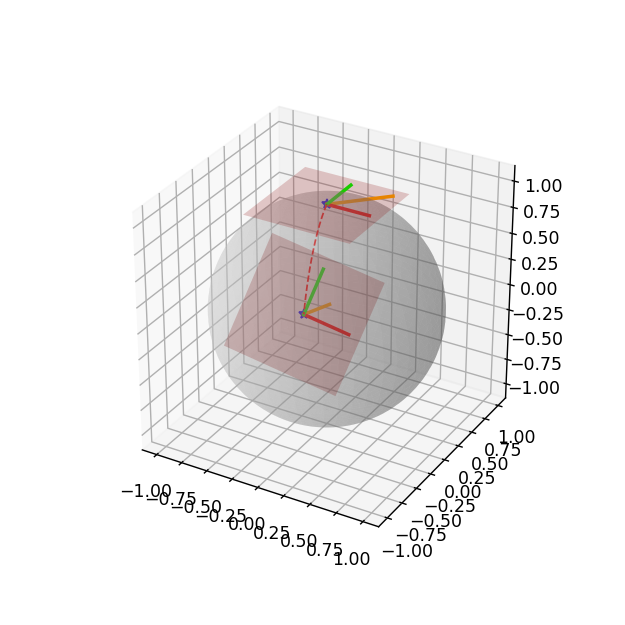

In [25]:
%matplotlib notebook

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='3d')
PlotSphere(ax, alpha=0.3)

g = SpherePoint(0.0, np.pi)
h = SpherePoint(1.1, 1.6*np.pi)
g_tan = TangentVector(g)

PlotBase(ax, g)
PlotBase(ax, h)
PlotParallelTransport(ax, g_tan, g, h)

PlotTangentPlane(ax, g, len_vert=1, color='red', alpha=0.2, linewidth=0)
PlotTangentPlane(ax, h, len_vert=1, color='red', alpha=0.2, linewidth=0)

PlotTangentBase(ax, g)
PlotTangentBase(ax, h)

PlotGeodesic(ax, g, h)

# I and II Fundamental Forms

Lets inspect a subset of a manifold $M$ - a surface $S$ - that has a chart $\psi$ that maps it to a subset $\Omega \in \mathbb{R}^2$. This surface can be represented by a radius vector $r = r(\theta, \phi)$.
Hence, $\theta$ and $\phi$ are coordinates on the surface.

The length - distance between its ends - of a curve $\gamma$ on $S$ is:
$$length(\gamma) =
\int^b_a\sqrt{I(\dot{\gamma}, \dot{\gamma})}dt $$
where
$I(v,w) = E \cdot v_1\cdot w_1 + F \cdot v_1 \cdot w_2 + F \cdot v_2 \cdot w_1 + G \cdot v_2 \cdot w_2$ (**first fundamental form**) and
$E = (r_{\theta}, r_{\theta}), F = (r_{\theta}, r_{\phi}), G = (r_{\phi}, r_{\phi})$

Imagine that on the $S$ we have two points: point $P(\theta, \phi)$ and an infinitesimally close to it point $P'(\theta + d\theta, \phi + d\phi)$.

$dr = d\theta \cdot r_{\theta} + d\phi \cdot r_{\phi}$ - is a differential of the radius vector along the direction from point $P$ to the point $P'$. 

The deviation of the point $P'$ from the tangent space $T_{P}$ can be expressed utilizing the **second fundamental form** as:
$$\delta = \frac{1}{2} L \cdot du^2 + 2M \cdot du \cdot dv + N \cdot dv^2,$$
where $L = (r_{\theta, \theta}, n)$, $M = (r_{\theta, \phi}, n)$, $N = (r_{\phi, \phi}, n)$ and $n$ - is a normal unit vector to the $S$ at $P$.

In [26]:
def PlotCurve(ax, linewidth=1, linestyle='-', color='red', **kwargs):
    t = np.linspace(0, np.pi, 100)

    ax.plot(t, t, linewidth=linewidth, linestyle=linestyle, color=color, **kwargs)

    ax.set_xlim([0, np.pi])
    ax.set_ylim([0, 2*np.pi])
    
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel('$\phi$')

In [27]:
def PlotCurve3D(ax, linewidth=1, linestyle='-', color='red', **kwargs):
    t = np.linspace(0, np.pi, 100)
    points = SpherePoint(t, t, R=1.0)

    ax.plot(points[0], points[1], points[2], linewidth=linewidth,
            linestyle=linestyle, color=color, **kwargs)

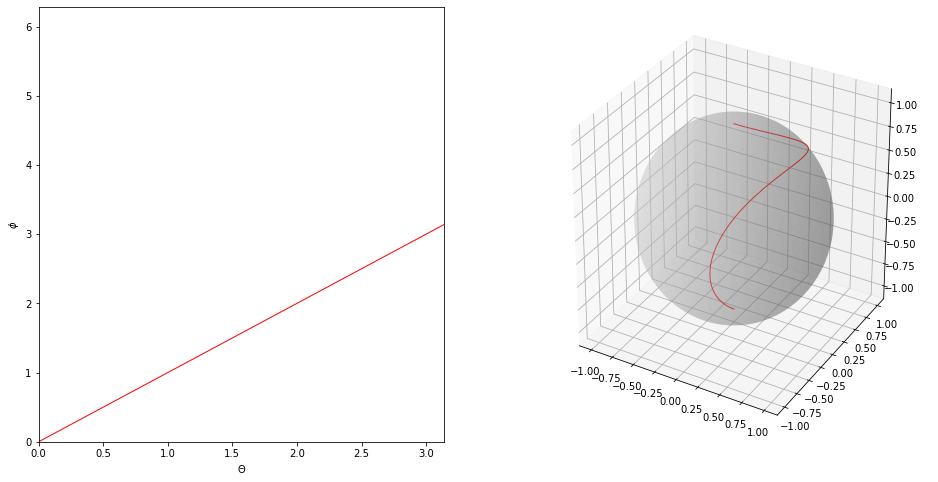

In [28]:
%matplotlib inline

plt.figure(figsize=(16,8))
ax = plt.subplot(121)
PlotCurve(ax)

ax = plt.subplot(122, projection='3d')
PlotCurve3D(ax)
PlotSphere(ax, alpha=0.3)

# $I^{st}$ Form

In [29]:
import sympy as sp

In [30]:
theta, phi = sp.symbols('theta phi')

In [31]:
def Mapping(theta, phi):
    x = sp.sin(theta)*sp.cos(phi)
    y = sp.sin(theta)*sp.sin(phi)
    z = sp.cos(theta)
    
    return x, y, z

In [32]:
x, y, z = Mapping(theta, phi)

In [33]:
def TangentBasis(x, y, z, theta, phi):
    r1 = sp.Matrix([[x.diff(theta), y.diff(theta), z.diff(theta)]]).T
    r2 = sp.Matrix([[x.diff(phi), y.diff(phi), z.diff(phi)]]).T
    
    return r1, r2

In [34]:
r1, r2 = TangentBasis(x, y, z, theta, phi)

In [35]:
def FirstFormMatrix(r1, r2):
    E = sp.simplify(r1.dot(r1))
    F = sp.simplify(r1.dot(r2))
    G = sp.simplify(r2.dot(r2))
    
    return sp.Matrix([[E, F], [F, G]])

In [36]:
A = FirstFormMatrix(r1, r2)

In [37]:
def CreateCurve(t):
    gamma = t
    
    return gamma

In [38]:
t = sp.symbols('t')

In [39]:
gamma = CreateCurve(t)

In [40]:
def CurveVelocity(gamma):
    return sp.Matrix([[gamma.diff(t), gamma.diff(t)]]).T

In [41]:
v = sp.symbols('v')

In [42]:
v = CurveVelocity(gamma)

In [43]:
def FirstForm(v, w, A):
    return v.dot(A*w)

In [44]:
FirstForm(v, v, A)

sin(theta)**2 + 1

In [45]:
def CurveLength(v, A, a, b):
    return sp.integrate(sp.sqrt(FirstForm(v, v, A.subs(theta, t))), (t, a, b)).n()

In [46]:
CurveLength(v, A, 0, sp.pi)

3.82019778902771

# ${II}^{nd}$ Form

<IPython.core.display.Javascript object>


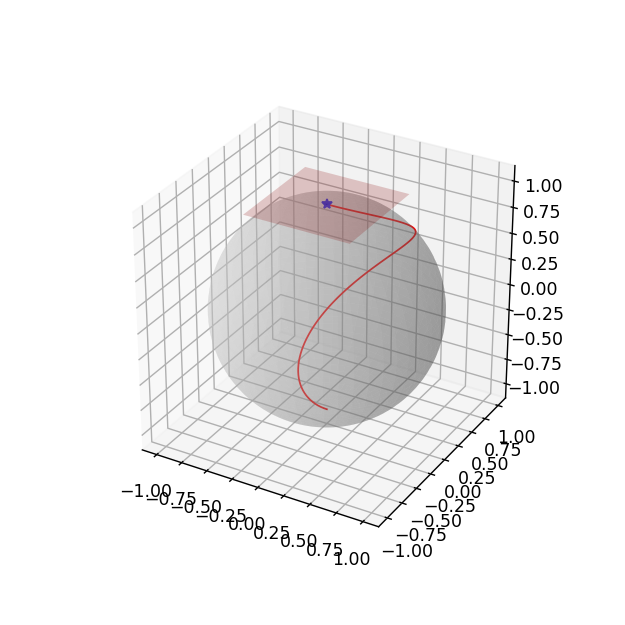

In [47]:
%matplotlib notebook

plt.figure(figsize=(5,5))

ax = plt.subplot(111, projection='3d')
PlotCurve3D(ax)
PlotSphere(ax, alpha=0.3)

g = SpherePoint(0.0, 0.0)
PlotTangentPlane(ax, g, len_vert=1, color='red', alpha=0.2, linewidth=0)
PlotBase(ax, g)

In [48]:
def SecondFormMatrix(r11, r12, r22, m):
    L = r11.dot(m)
    M = r12.dot(m)
    N = r22.dot(m)
    
    return sp.Matrix([[L, M], [M, N]])

In [49]:
def SecondForm(v, w, r1, r2):
    m = r1.cross(r2)/(r1.cross(r2)).norm()
    
    r11 = sp.Matrix([[r1.diff(theta)]])
    r12 = sp.Matrix([[r1.diff(phi)]])
    r22 = sp.Matrix([[r2.diff(phi)]])
    
    A = SecondFormMatrix(r11, r12, r22, m)
    return sp.Abs(v.dot(A*w))

In [50]:
g = SpherePoint(float(gamma.subs(t, 0.05)), float(gamma.subs(t, 0.05)))
h = SpherePoint(float(gamma.subs(t, 0.5)), float(gamma.subs(t, 0.5)))

In [51]:
SecondForm(sp.Matrix(Log(h, g) - Log(g, g)), sp.Matrix(Log(h, g) - Log(g, g)), r1, r2).subs([(theta, 0.05), (phi, 0.05)])

0.152024752314929

<IPython.core.display.Javascript object>


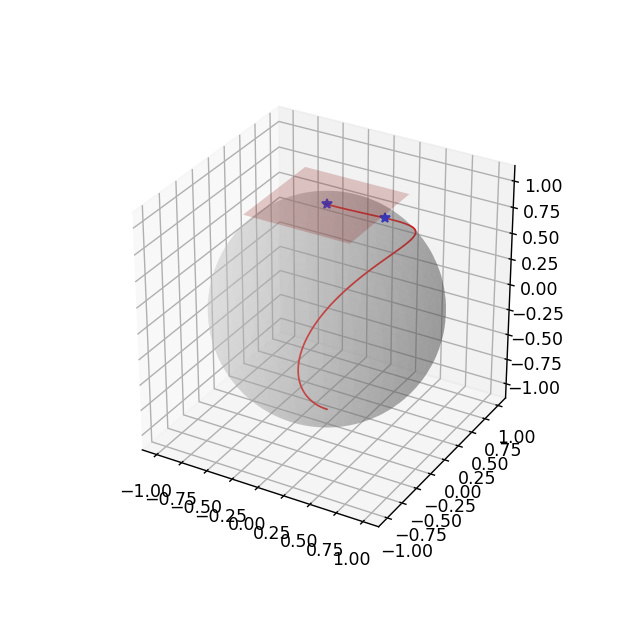

In [52]:
%matplotlib notebook

plt.figure(figsize=(5,5))

ax = plt.subplot(111, projection='3d')
PlotCurve3D(ax)
PlotSphere(ax, alpha=0.3)

g = SpherePoint(0.0, 0.0)
PlotTangentPlane(ax, g, len_vert=1, color='red', alpha=0.2, linewidth=0)
PlotBase(ax, g)
PlotBase(ax, h)